In [82]:
import numpy as np   # numerical module
import pandas as pd  # dataframe

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
%matplotlib inline

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# check
from sklearn.metrics import mean_absolute_error

In [5]:
# url link to the data
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

# loading the dataframe
df = pd.read_csv(url)

# checking the column names, shape, dtypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [86]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


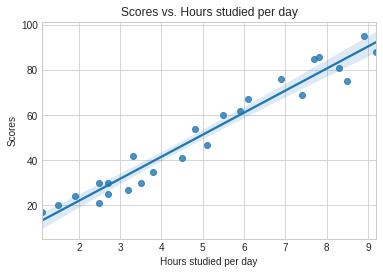

In [72]:
# plotting the data to get some insights
sns.regplot(x=df['Hours'],y=df['Scores'],seed=42)
plt.xlabel('Hours studied per day')
plt.title('Scores vs. Hours studied per day')
plt.show()

In [48]:
# splitting the data
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

# train, test
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.1,random_state=42)
xtr.shape,xts.shape,ytr.shape,yts.shape

((22, 1), (3, 1), (22,), (3,))

In [88]:
# building a model
lr = LinearRegression()
lr.fit(xtr,ytr)

ypr = lr.predict(xts)

In [100]:
pd.DataFrame({'actual':yts,'predicted':map(int,ypr)})
# As the actual scores are all integers, it only made sense to make all the predicted into integers to

,actual,predicted
0,81,83
1,30,27
2,21,27


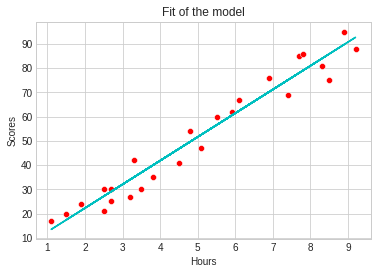

In [65]:
sns.scatterplot(data=df,x='Hours',y='Scores',color='r')
plt.plot(x,lr.intercept_+lr.coef_*x,color='c')
plt.title('Fit of the model')
plt.show()

In [96]:
# predicting the score when studied for 9.5 hours

hour = [[9.25]]
score = lr.predict(hour)
print(f'By studying for {hour[0][0]} it is predicted that {round(score[0])} marks can be obtained.')

By studying for 9.25 it is predicted that 93 marks can be obtained.


In [98]:
# checking the mean absolute error

print(f'Mean Absolute Error: {mean_absolute_error(y_true=yts,y_pred=ypr)}')

Mean Absolute Error: 3.9657593887812084
